In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

In [0]:
#Loading the datasets

In [0]:
oecd_betterlifeindex_df = pd.read_csv("OECD_BLIData.csv", thousands= ',')
weo_df = pd.read_csv("WEO_Data.xls", delimiter='\t', encoding='latin1', na_values="n/a", thousands= ',')

Columns in OECD_better_life_index dataset

In [3]:
print(oecd_betterlifeindex_df.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')


Columns in WEO_ GDP dataset

In [4]:
print(weo_df.columns)

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


In [0]:
print(oecd_betterlifeindex_df.count), print(weo_df.count)

In [14]:
oecd_betterlife_totdf = oecd_betterlifeindex_df[oecd_betterlifeindex_df["INEQUALITY"]=="TOT"] 
oecd_betterlife_totdf

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.20,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.90,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,7.60,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.70,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,29.80,NaN,NaN


In [15]:
oecd_betterlife_pivotdf = oecd_betterlife_totdf.pivot(index="Country", columns="Indicator", values="Value")
oecd_betterlife_pivotdf

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,3.7,81.5,6.9,3.54,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,6.0,81.9,7.4,0.77,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,8.7,79.9,6.5,NaN,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,3.1,79.1,6.7,1.04,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,4.2,80.9,7.6,1.31,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [17]:
oecd_betterlife_pivotdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Australia to United States
Data columns (total 24 columns):
Air pollution                                        41 non-null float64
Dwellings without basic facilities                   38 non-null float64
Educational attainment                               40 non-null float64
Employees working very long hours                    39 non-null float64
Employment rate                                      41 non-null float64
Feeling safe walking alone at night                  41 non-null float64
Homicide rate                                        41 non-null float64
Household net adjusted disposable income             30 non-null float64
Household net wealth                                 28 non-null float64
Housing expenditure                                  39 non-null float64
Labour market insecurity                             34 non-null float64
Life expectancy                                      41 non-null float64
Life sa

In [44]:
weo_df.set_index(keys="Country", inplace=True)
weo_df.info()
weo_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to International Monetary Fund, World Economic Outlook Database, April 2016
Data columns (total 6 columns):
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(4)
memory usage: 10.4+ KB


,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [0]:
#Prepare the data by merging the dataframes (oecd_betterlifeindex_df, weo_df) on the common column 'country'
country_statistical_datadf = pd.merge(oecd_betterlife_pivotdf, weo_df, on='Country') 

Columns in the new dataset prepared for analyisis

In [46]:
print(country_statistical_datadf.columns)

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Subject Descriptor', 'Units',
       'Scale', 'Country/Series-specific Notes', '2015',
       'Estimates Start After'],
      dtype='object')


In [47]:
print(country_statistical_datadf.count)

<bound method DataFrame.count of                  Air pollution  ...  Estimates Start After
Country                         ...                       
Australia                  5.0  ...                 2014.0
Austria                   16.0  ...                 2015.0
Belgium                   15.0  ...                 2014.0
Brazil                    10.0  ...                 2014.0
Canada                     7.0  ...                 2015.0
Chile                     16.0  ...                 2014.0
Colombia                  10.0  ...                 2014.0
Czech Republic            20.0  ...                 2015.0
Denmark                    9.0  ...                 2015.0
Estonia                    8.0  ...                 2014.0
Finland                    6.0  ...                 2014.0
France                    13.0  ...                 2015.0
Germany                   14.0  ...                 2014.0
Greece                    18.0  ...                 2014.0
Hungary                

In [48]:
country_statistical_datadf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Australia to United States
Data columns (total 30 columns):
Air pollution                                        40 non-null float64
Dwellings without basic facilities                   37 non-null float64
Educational attainment                               39 non-null float64
Employees working very long hours                    38 non-null float64
Employment rate                                      40 non-null float64
Feeling safe walking alone at night                  40 non-null float64
Homicide rate                                        40 non-null float64
Household net adjusted disposable income             29 non-null float64
Household net wealth                                 27 non-null float64
Housing expenditure                                  38 non-null float64
Labour market insecurity                             33 non-null float64
Life expectancy                                      40 non-null float64
Life sa

In [50]:
country_statistical_datadf.sort_values(by="2015", inplace=True)
country_statistical_datadf.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,NaN,57.5,4.7,16.46,NaN,88.0,NaN,NaN,NaN,NaN,14.92,73.0,67.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,NaN,76.2,6.3,0.79,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6083.510,2014.0
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,16.0,25.5,38.0,28.70,61.0,41.8,18.1,NaN,NaN,20.0,5.5,75.4,6.5,0.07,15314.0,81.0,1.0,66.0,3.2,416.0,NaN,63.0,68.0,15.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,14.8,94.0,0.14,70.0,52.8,9.6,NaN,NaN,18.0,NaN,71.8,5.8,1.59,NaN,89.0,0.9,43.0,NaN,492.0,NaN,68.0,55.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0


Get the subset dataframe with life satisfaction as the indicator

In [0]:
X = np.c_[country_statistical_datadf["2015"]]
Y = np.c_[country_statistical_datadf["Life satisfaction"]]

Visualization of GDP information of 2015 against the Average Score LIfe Satisfaction of each country

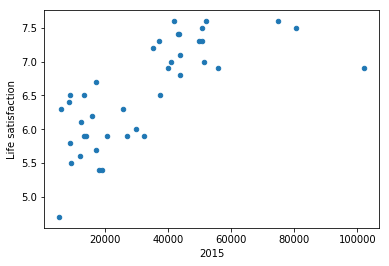

In [36]:
country_statistical_datadf.plot.scatter(x="2015", y="Life satisfaction")
plt.show()

Select a linear model

In [0]:
linear_regression_model = sklearn.linear_model.LinearRegression()

Train a model

In [38]:
linear_regression_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

New instance for test

In [0]:
X_new = [[22587]] # GDP_ per capita information for the country Cyprus

Value predicted on new instance

In [40]:
print(linear_regression_model.predict(X_new)) # Average score of Life Satisfaction computed

[[6.28176479]]
